                                                                                                 B08605042/李鴻根

Packages and set data set

In [15]:
library(ggplot2)
library(dplyr)
df <- read.csv("/Users/danielkent/Desktop/Statistic_1/HW2/H2RandomWalk.csv")
df2 <- read.csv("/Users/danielkent/Desktop/Statistic_1/HW2/H2Q2.csv")

Q1 (2 points) Random walk [1] is a mathematical object, known as a stochastic or random pro- cess, it is easy to be understood by imaging that a drunk person walking. Random walk is used for simulating the price change in the finance application. Draw a 2-dimension random walk path plot using H2RandomWalk.csv data.

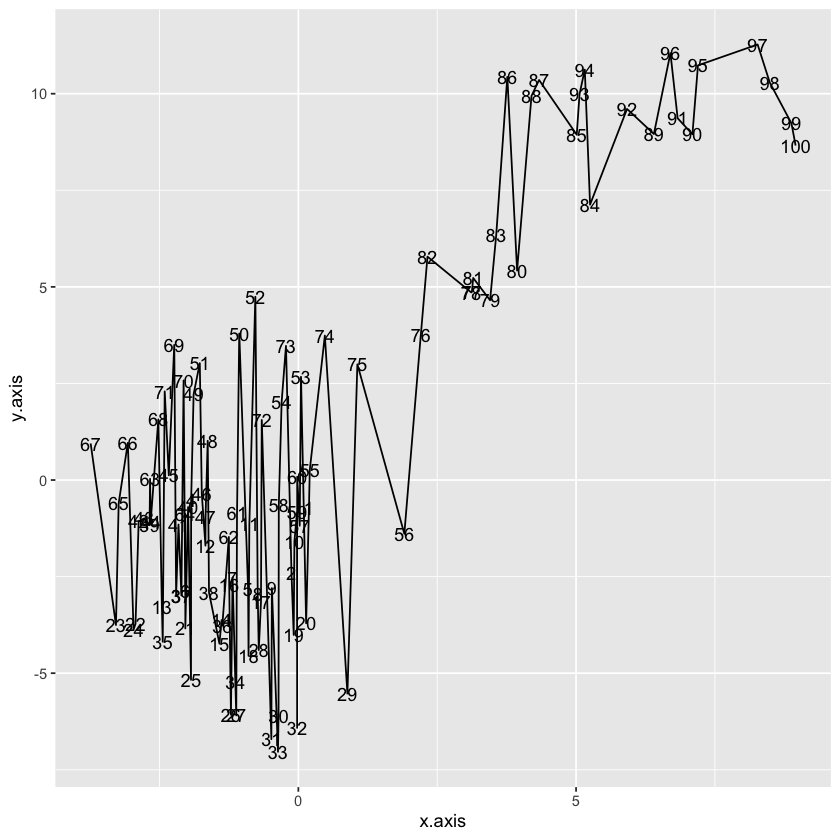

In [3]:
rw_plot1 = ggplot(df, aes(x=x.axis, y=y.axis)) + geom_text(aes(label=step)) + geom_line()
print(rw_plot1)

Q2 (5 points) Draw a diagram, a box plot and a pie plot that discribe the frequency of the data in H2Q2.csv. 
(You may classify the data using the interval with range 5 if needed.)

Here I classify the data using the interval with range 5 using dplyr package functions

In [4]:
df2 <- df2 %>%
				mutate(
				  # Create categories
				  age_group = dplyr::case_when(
				    age < 5            ~ "0-5",
				    age > 5  & age <= 10 ~ "6-10",
				    age > 10 & age <= 15 ~ "11-15",
						age > 15 & age <= 20 ~ "16-20",
				    age > 20 & age <= 25 ~ "21-25",
				    age > 25 & age <= 30 ~ "26-30",
				    age > 30 & age <= 35 ~ "31-35",
						age > 35 & age <= 40 ~ "36-40",
				    age > 40 & age <= 45 ~ "41-45",
						age > 45 & age <= 50 ~ "46-50"
				  ),
				  # Convert to factor
				  age_group = factor(
				    age_group,
				    level = c("0-5","6-10","11-15","16-20","21-25","26-30","31-35","36-40","41-45","46-50")
				  )
				)
glimpse(df2)

Rows: 155
Columns: 3
$ id        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1…
$ age       <dbl> 41.18, 5.89, 12.53, 43.67, 11.08, 2.78, 4.46, 17.34, 14.19, …
$ age_group <fct> 41-45, 6-10, 11-15, 41-45, 11-15, 0-5, 0-5, 16-20, 11-15, 46…


Draw a diagram(interpreted it as histograms to know the frequency )
and here is the discrete one because I group it

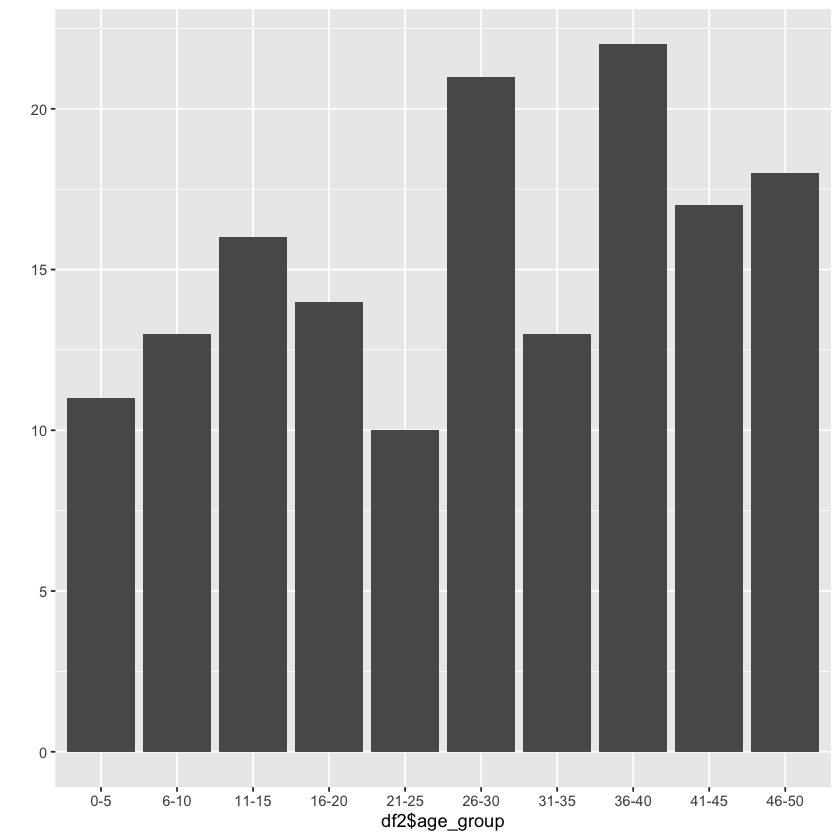

In [5]:
qplot(df2$age_group)

and here is the continous one 

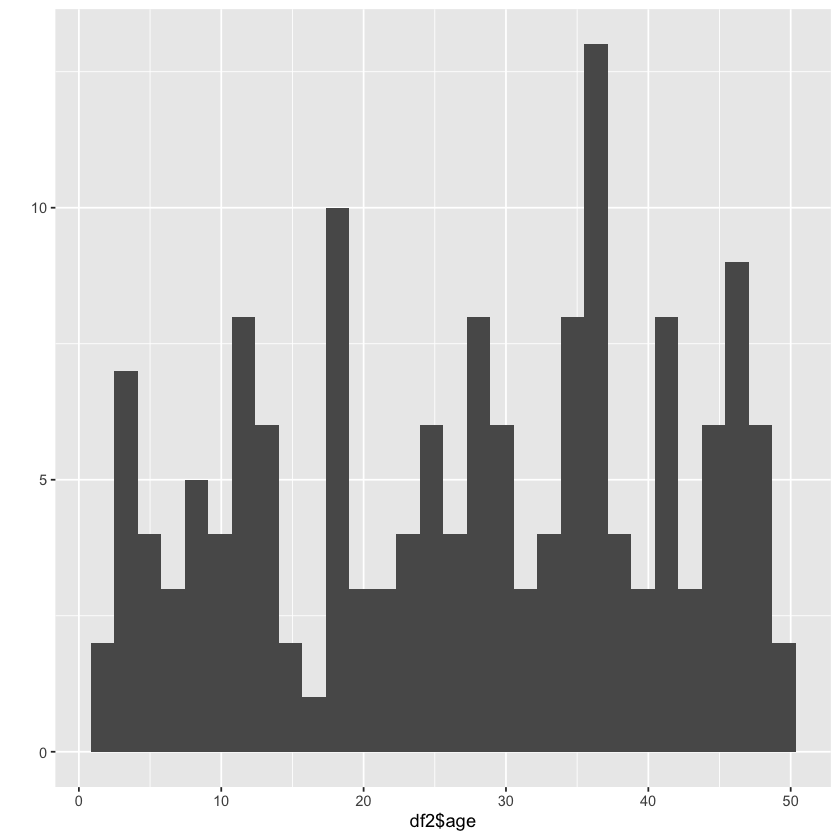

In [6]:
qplot(df2$age,bins = 30)

box plot (to show the age distribution in each group)

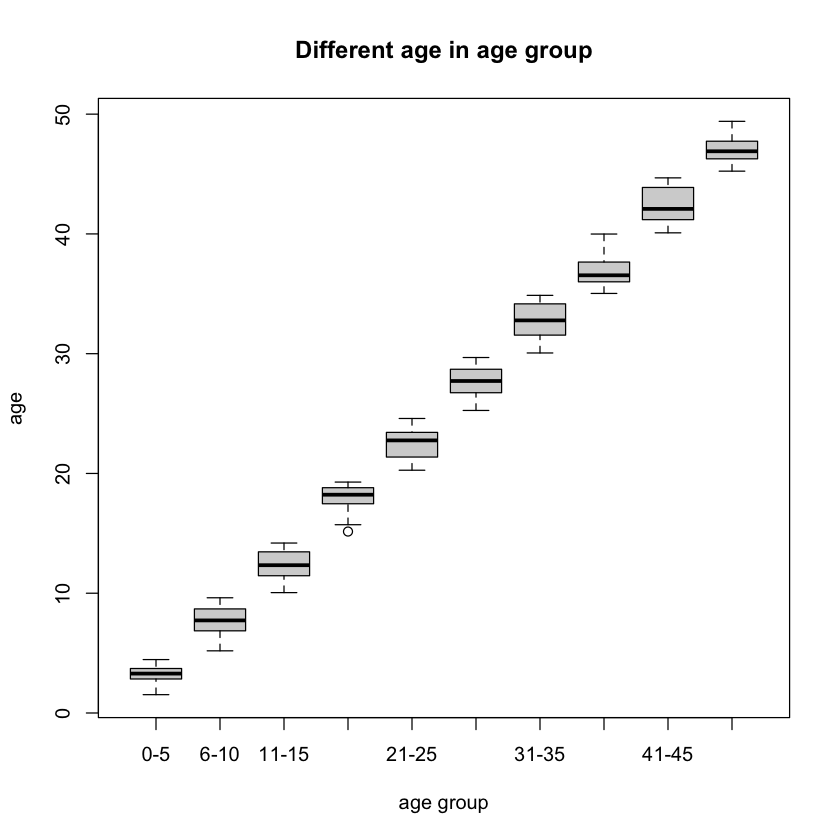

In [7]:
boxplot(age~age_group,data=df2,main="Different age in age group",xlab="age group",ylab="age")

there is one outlier there because the  assumption people >15 is 16 already for convenient
so if his/her 15th birthday already past then I assume he/she is doing his/her 16th year

Boxplot showing the distribution of the age in the whole sample

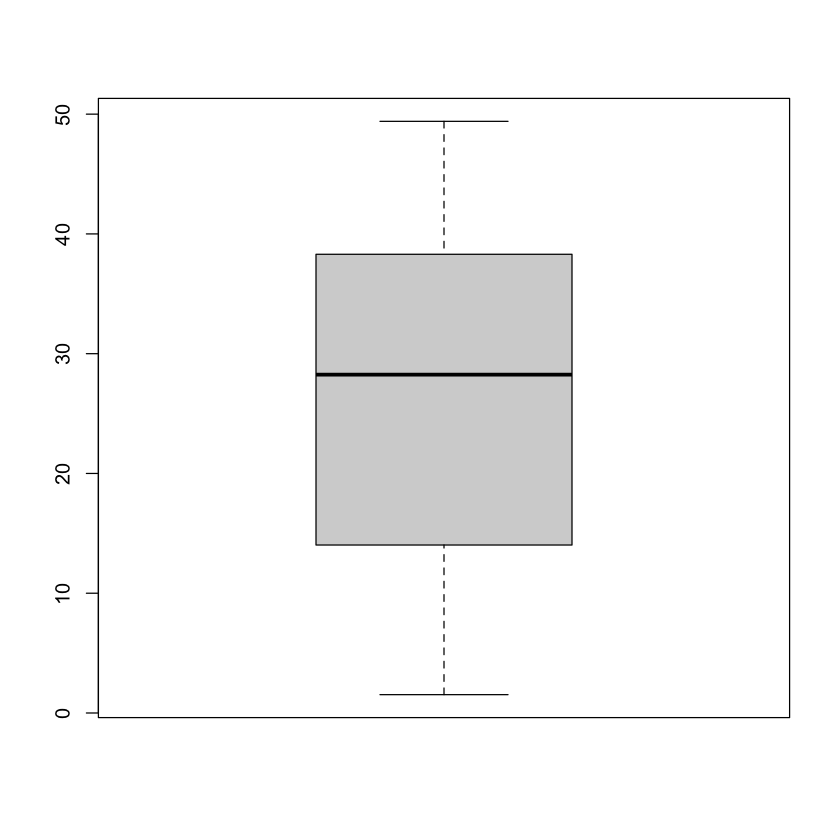

In [8]:
boxplot(df2$age)

pie chart (to be honest I am not a fan of pie chart because how hard it is to tell if there is more than 3 groups)

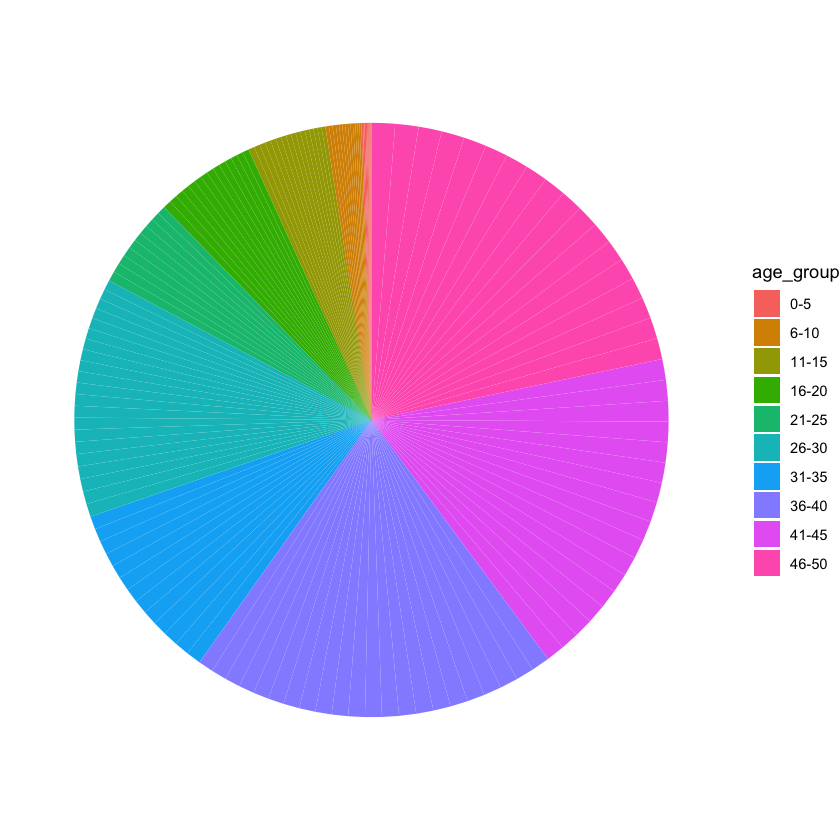

In [9]:
ggplot(df2, aes(x="", y=factor(age), fill=age_group)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)+
  theme_void()

Q3 (3 points) There is a 4-dimension dataset (y, x1, x2, x3) where x1 is the categorical data (e.g species, sex...) and y, x2, x3 are continuous data (e.g temperture, age...). How would you visualize the data?

Here I use one of the most common dataset in R which is Iris dataset which have categorical data (Species) and continous data (Sepal length, Sepal width,Petal Length, Petal Width

In [10]:
glimpse(iris)

Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s…


Here is scatter plot to show Petal Width vs Length on each species

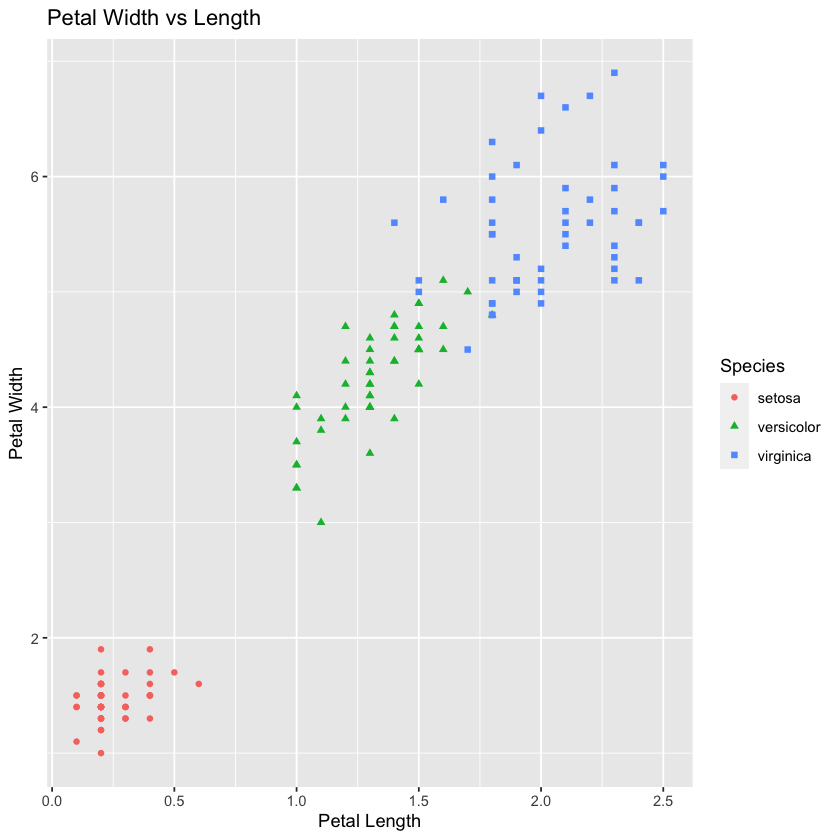

In [11]:
ggplot(data = iris, aes(x = Petal.Width, y = Petal.Length))+
  xlab("Petal Length")+
  ylab("Petal Width") +
  geom_point(aes(color = Species,shape=Species))+
  ggtitle("Petal Width vs Length")

Here is scatter plot to show Sepal Width vs Length on each species which seem to have cluster and linear relationship

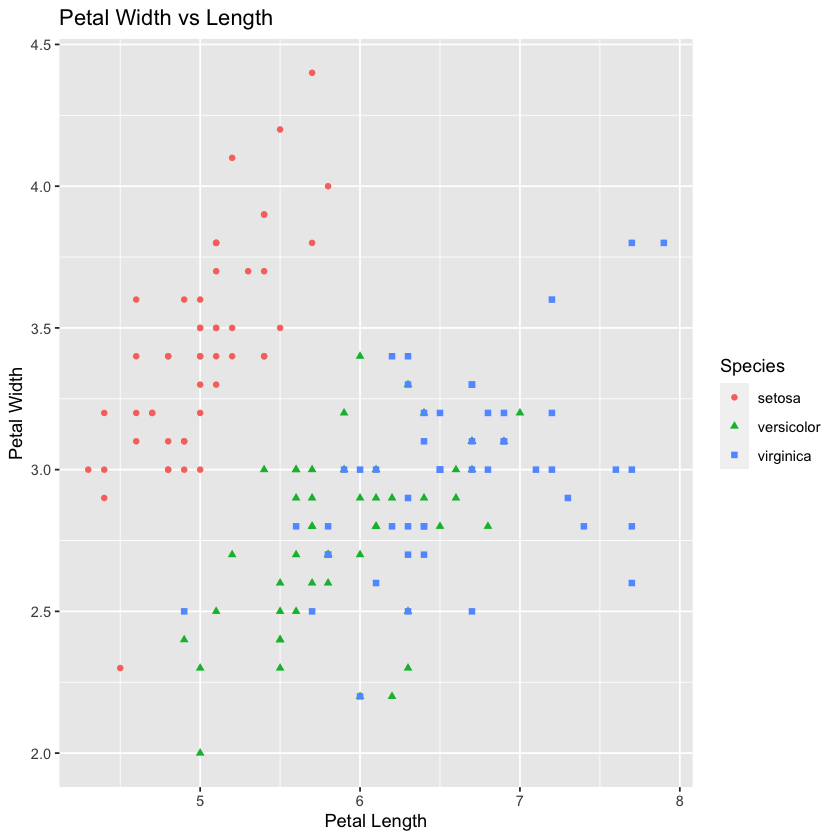

In [12]:
ggplot(data = iris, aes(x = Sepal.Length, y = Sepal.Width))+
  xlab("Petal Length")+
  ylab("Petal Width") +
  geom_point(aes(color = Species,shape=Species))+
  ggtitle("Petal Width vs Length")

While the Petal is more diverse and harder to differenciate cluster and relationship 

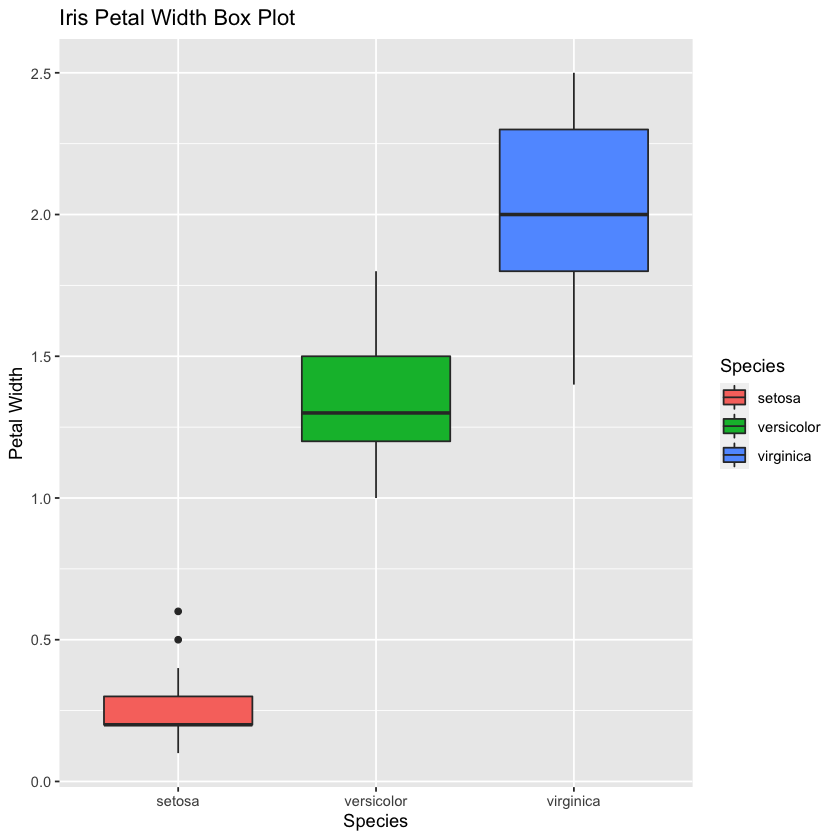

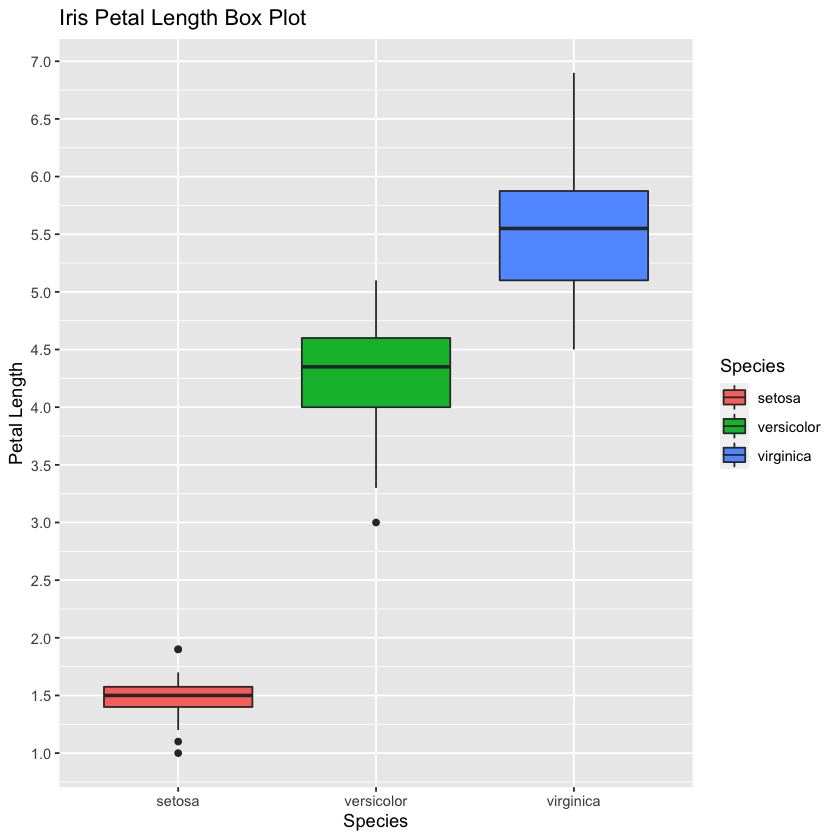

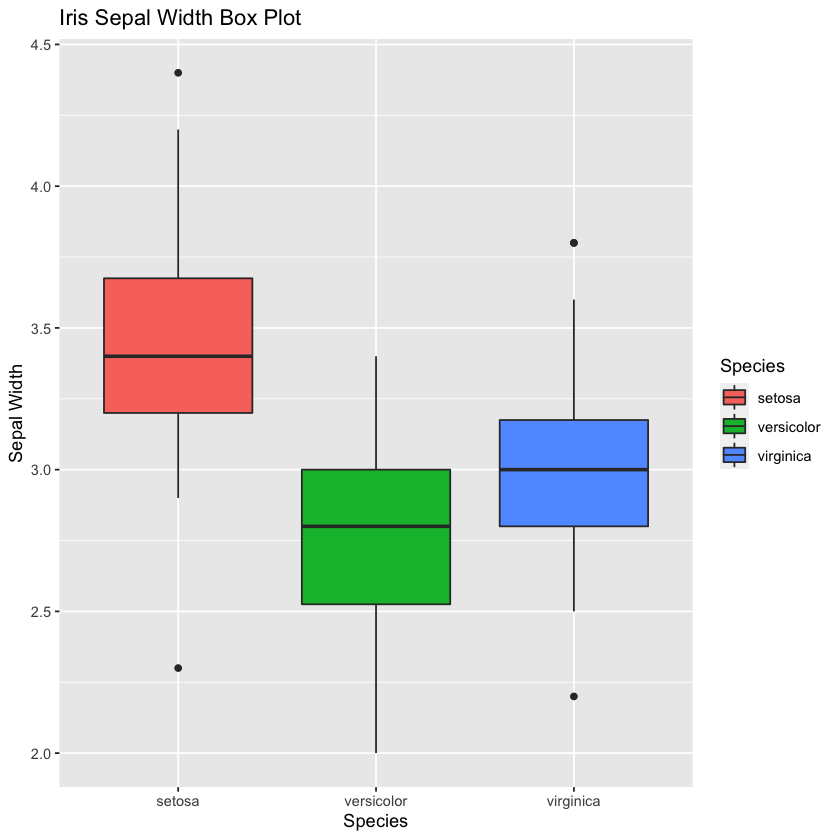

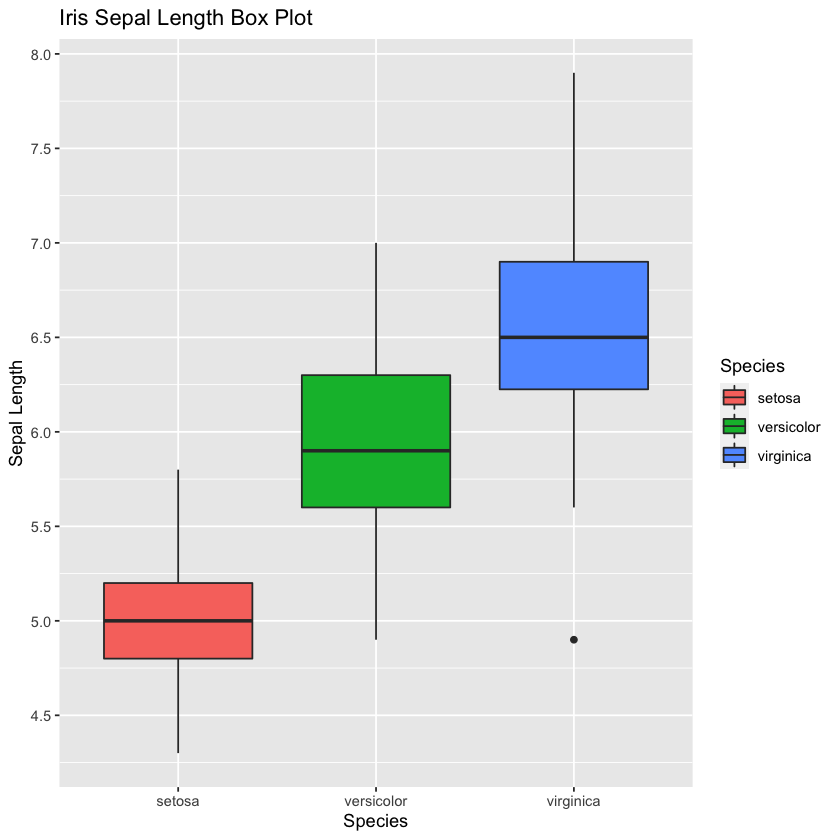

In [16]:
par(mfrow=c(2,2))
ggplot(iris, aes(Species, Petal.Width, fill=Species)) +
  geom_boxplot()+
  scale_y_continuous("Petal Width", breaks= seq(0,30, by=.5))+
  labs(title = "Iris Petal Width Box Plot", x = "Species")

ggplot(iris, aes(Species, Petal.Length, fill=Species)) +
  geom_boxplot()+
  scale_y_continuous("Petal Length", breaks= seq(0,30, by=.5))+
  labs(title = "Iris Petal Length Box Plot", x = "Species")

ggplot(iris, aes(Species, Sepal.Width, fill=Species)) +
  geom_boxplot()+
  scale_y_continuous("Sepal Width", breaks= seq(0,30, by=.5))+
  labs(title = "Iris Sepal Width Box Plot", x = "Species")

ggplot(iris, aes(Species, Sepal.Length, fill=Species)) +
  geom_boxplot()+
  scale_y_continuous("Sepal Length", breaks= seq(0,30, by=.5))+
  labs(title = "Iris Sepal Length Box Plot", x = "Species")